In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota = pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota1 = pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyota2 = toyota1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyota2[toyota2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
#droping the duplicate record
toyota3 = toyota2.drop_duplicates().reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyota3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [9]:
#CORRELATION ANALYSIS
toyota3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


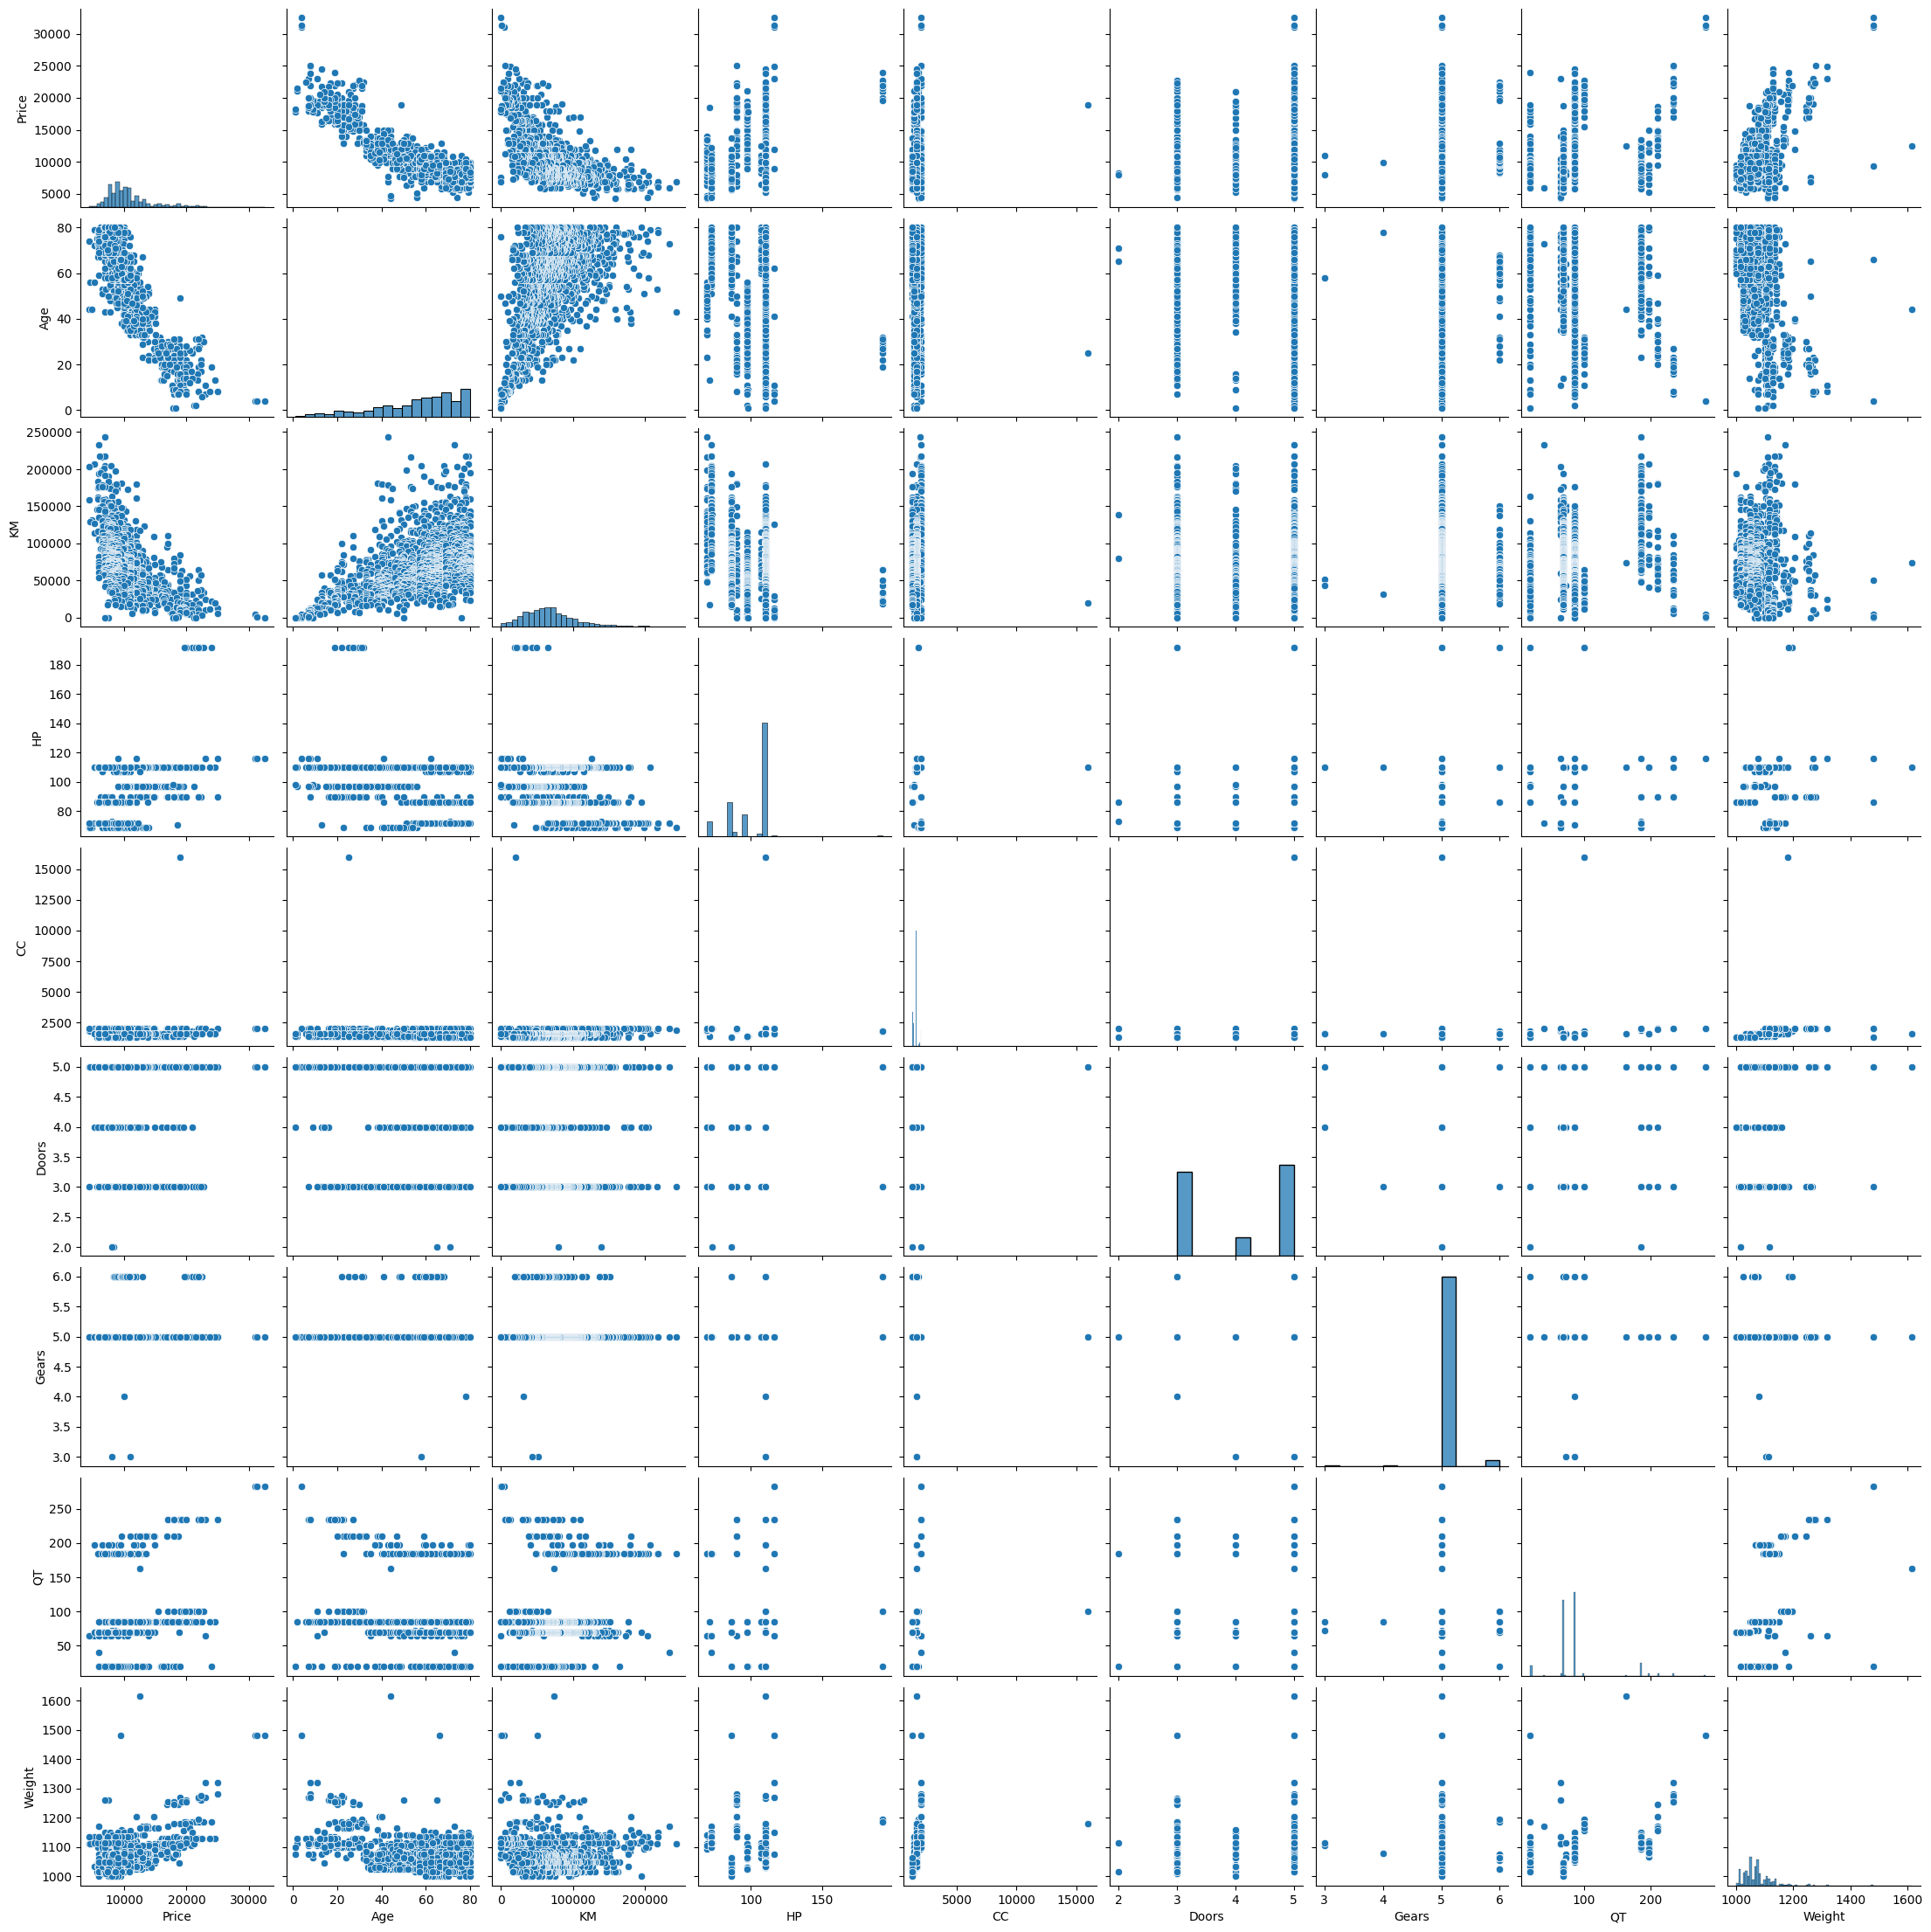

In [10]:
sns.pairplot(toyota3)

**MODEL BUILDING**

In [11]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit()

In [12]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [13]:
model.tvalues , model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [14]:
model.rsquared , model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

Now, building individual model.

In [15]:
model_c = smf.ols('Price~CC',data=toyota3).fit()
model_c.tvalues , model_c.pvalues #significant pvlaues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [16]:
model_d = smf.ols('Price~Doors',data=toyota3).fit()
model_d.tvalues , model_d.pvalues #significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [17]:
model_cd = smf.ols('Price~CC+Doors',data=toyota3).fit()
model_cd.tvalues , model_cd.pvalues #significant pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

**Colliniearity Check**

In [18]:
rsq1 = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif1= 1/(1-rsq1)

rsq2 = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif2= 1/(1-rsq2)

rsq3 = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif3= 1/(1-rsq3)

rsq4 = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota3).fit().rsquared
vif4= 1/(1-rsq4)

rsq5 = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota3).fit().rsquared
vif5= 1/(1-rsq5)

rsq6 = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota3).fit().rsquared
vif6= 1/(1-rsq6)

rsq7 = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota3).fit().rsquared
vif7= 1/(1-rsq7)

rsq8 = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota3).fit().rsquared
vif8= 1/(1-rsq8)

In [19]:
#creating a dataframe
df = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
      'VIF':[vif1,vif2,vif3,vif4,vif5,vif6,vif7,vif8]}

Vif_df = pd.DataFrame(df)
Vif_df

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


**No collinearity problem found.**

Residual Analysis

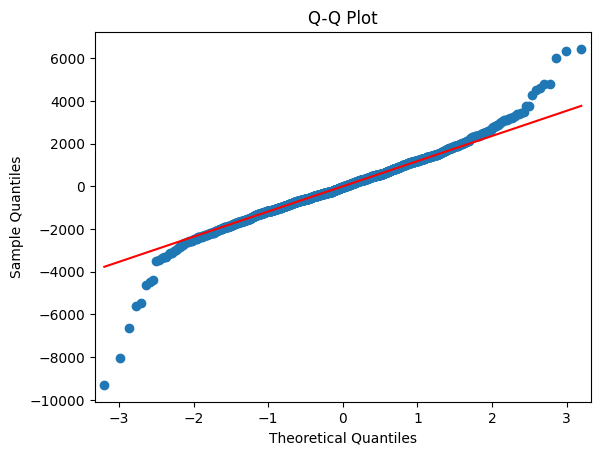

In [20]:
sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot')
plt.show()

In [21]:
#Test for Homoscedasticity or Hetroscedasticity
def standard_values(vals) : return (vals-vals.mean())/vals.std()

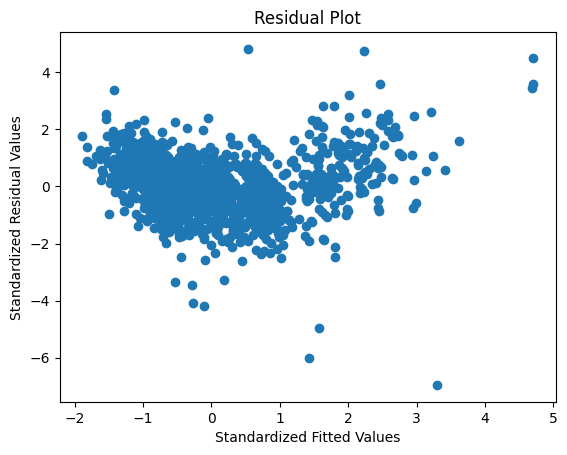

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

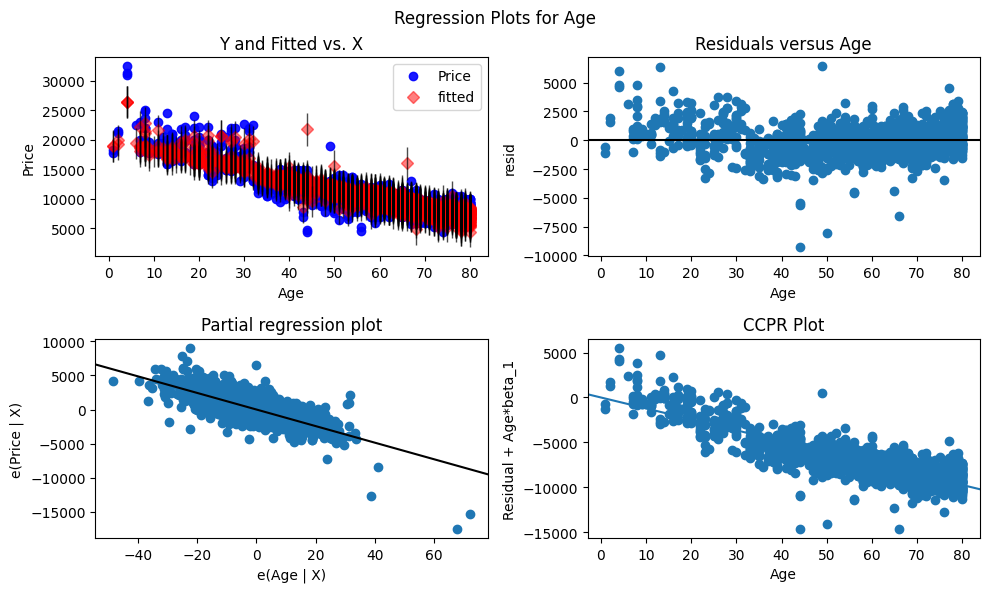

In [27]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

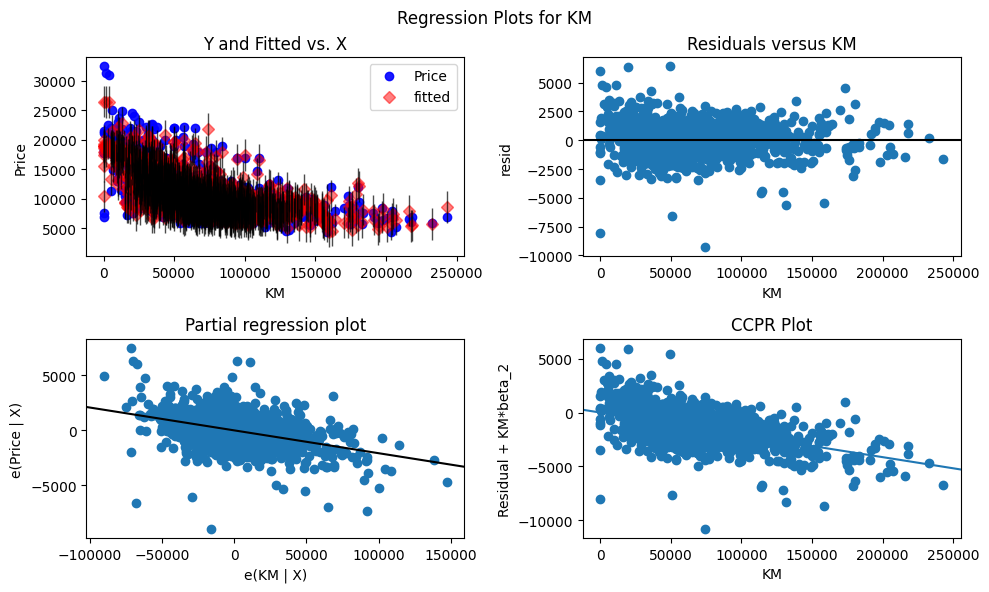

In [24]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

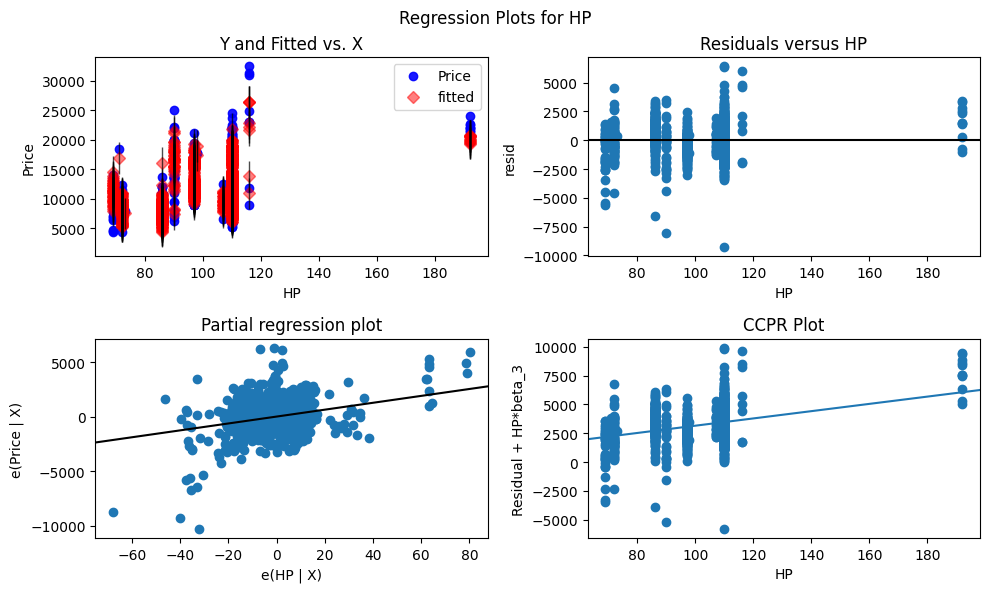

In [28]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

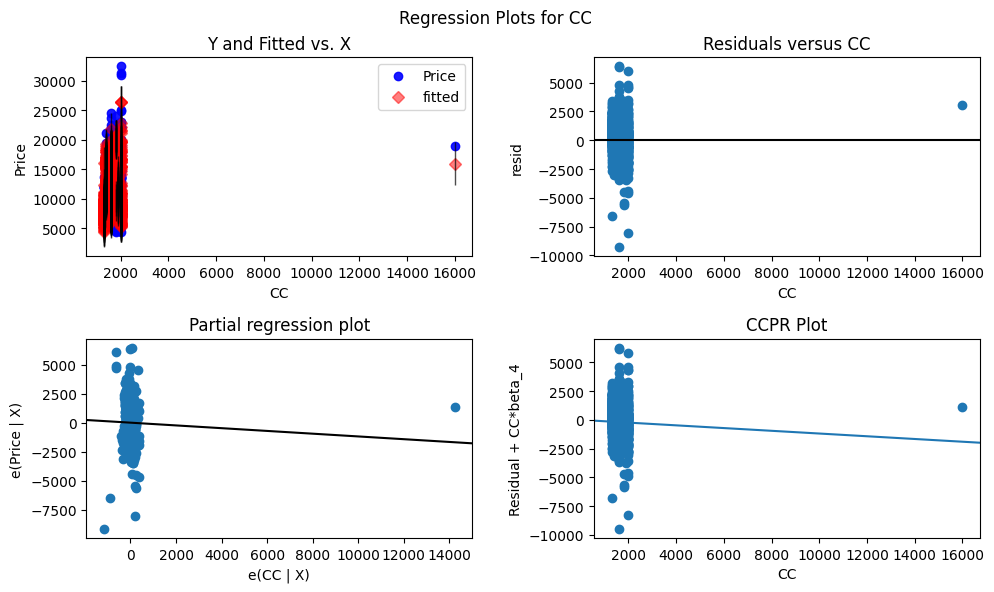

In [29]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

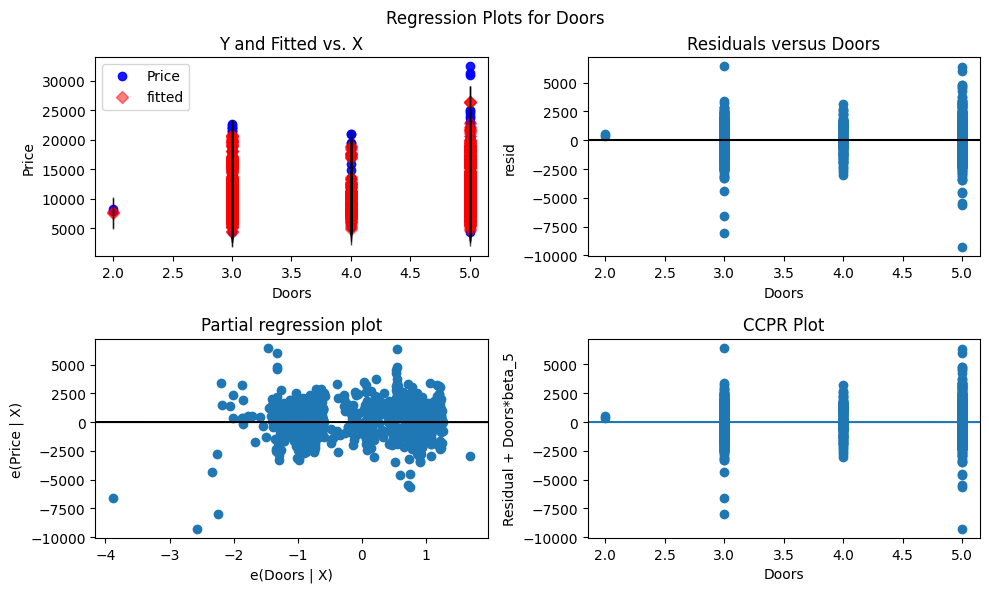

In [30]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

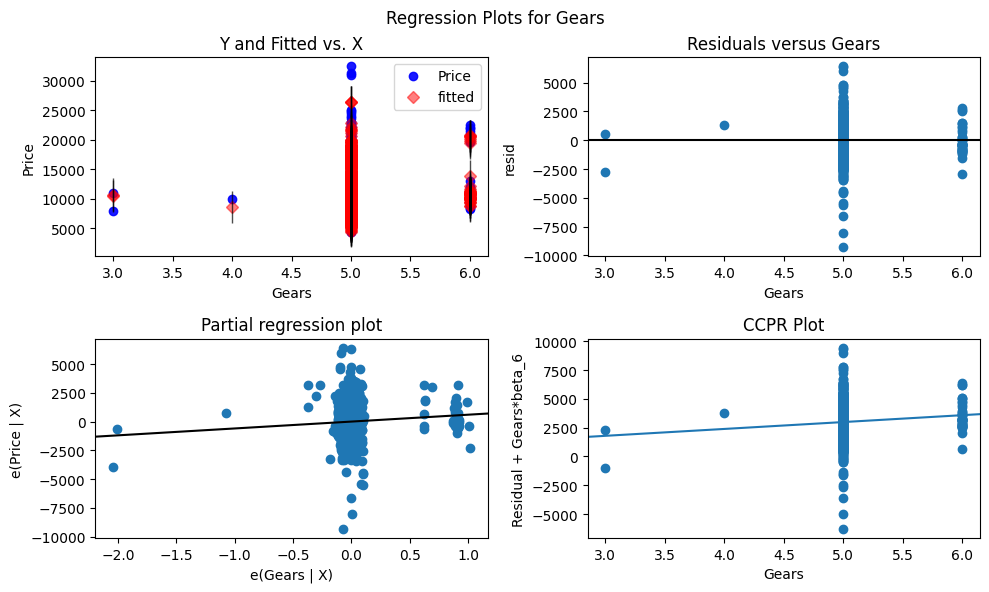

In [31]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

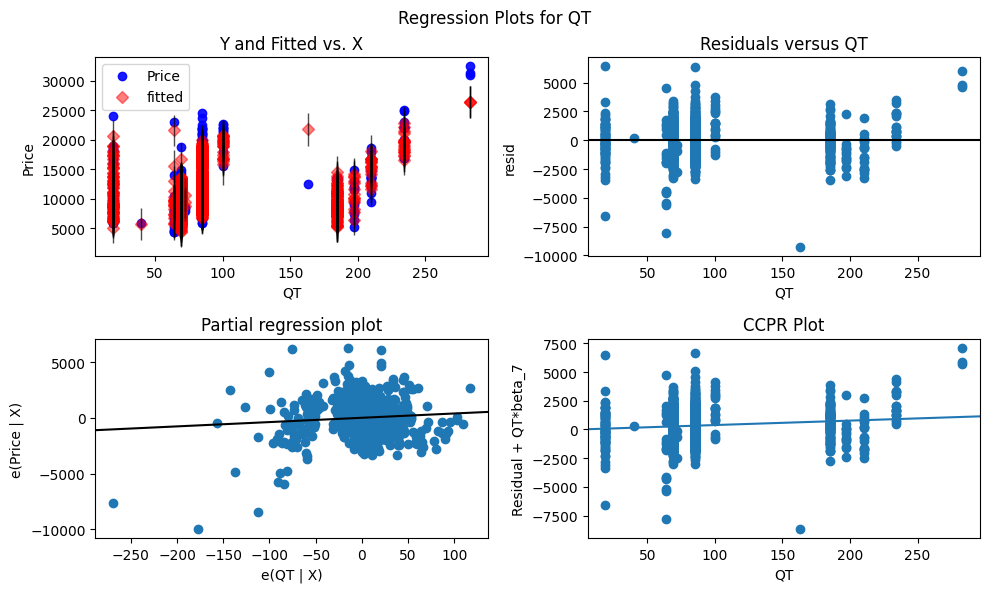

In [32]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

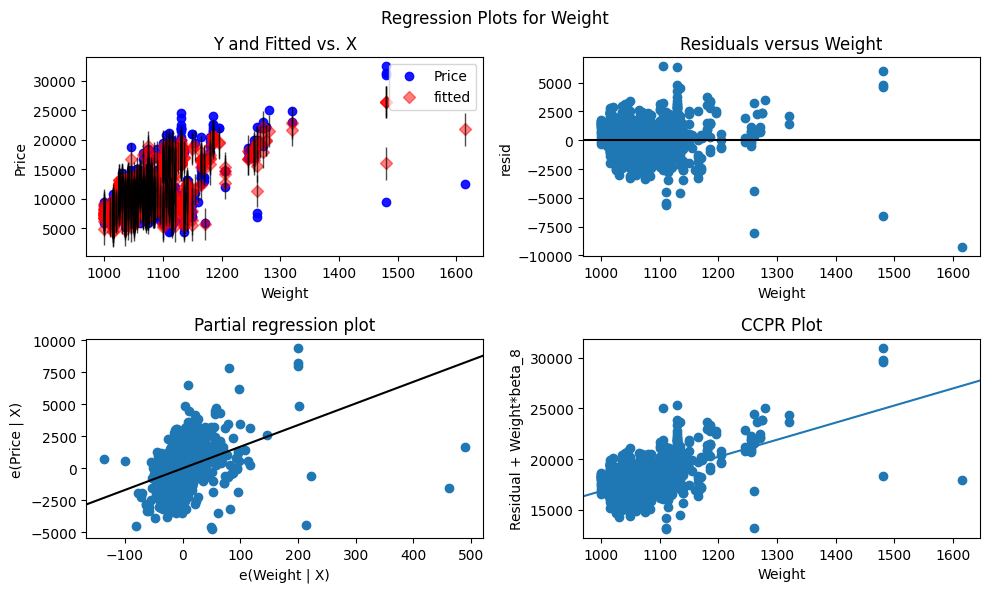

In [33]:
fig=plt.figure(figsize=(10,6))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [34]:
#COOK'S  DISTANCE
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

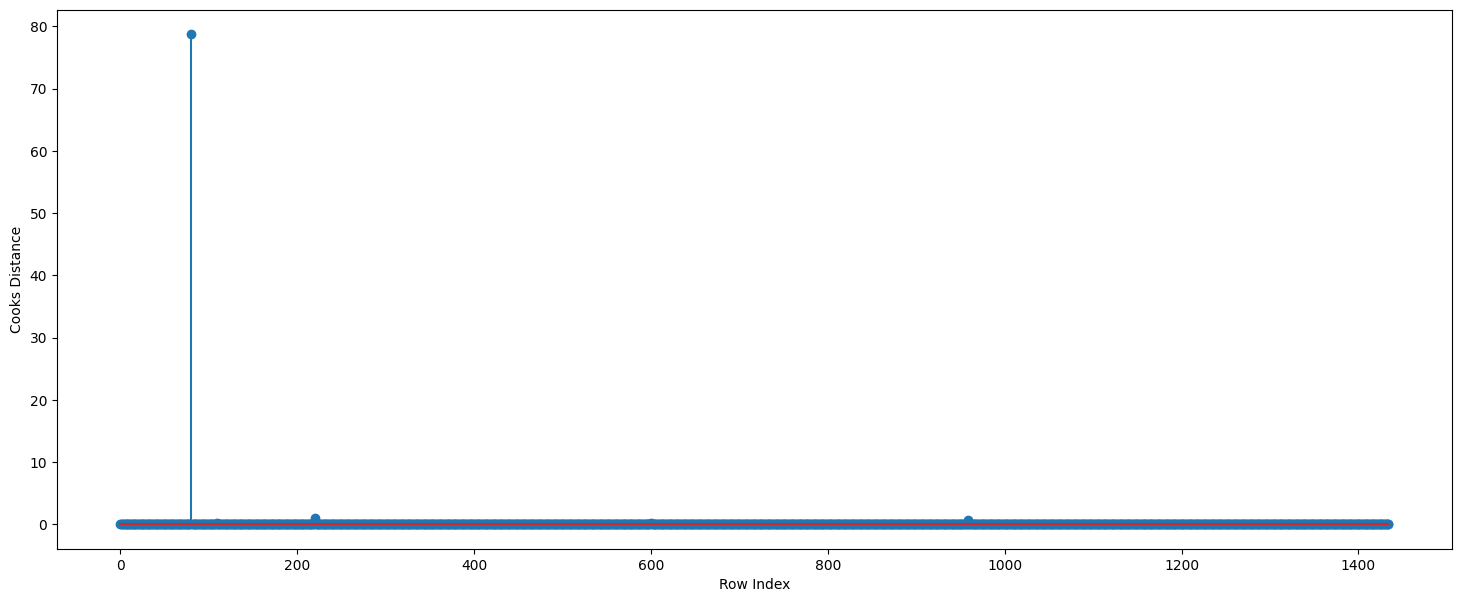

In [36]:
#Plotting Influencers
fig=plt.figure(figsize=(18,7))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

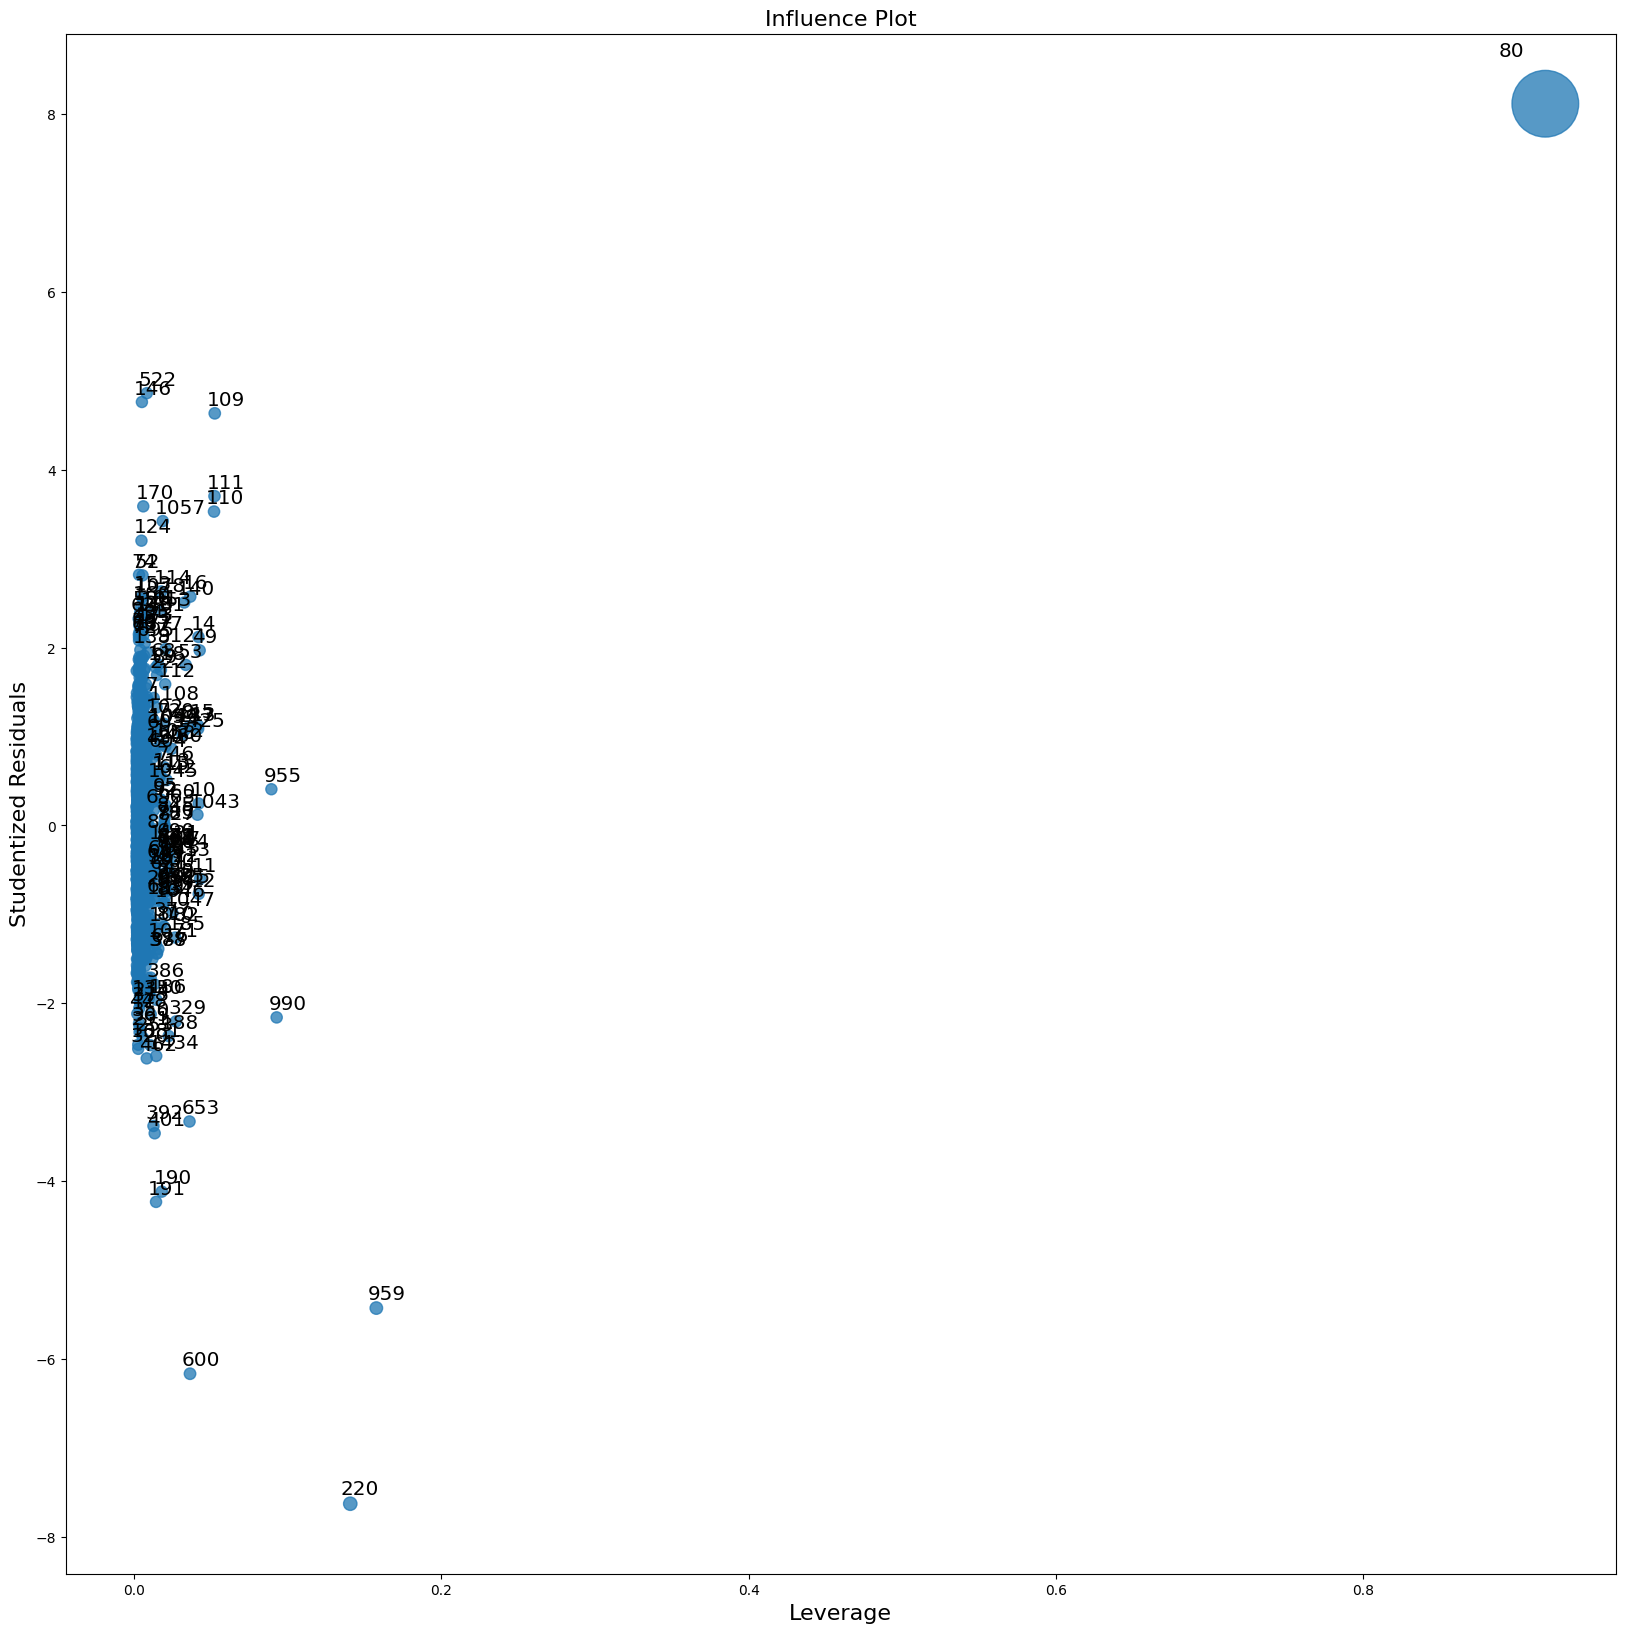

In [38]:
# Leverage Value
fig,ax = plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [39]:
k=toyota3.shape[1]
n=toyota3.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.020905923344947737

MODEL IMPROVEMENT

In [40]:
data = toyota3.copy()
data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [41]:
#Discarding influencer point
toyota4 = data.drop(data.index[[80]],axis=0).reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


FINAL MODEL

In [42]:
while np.max(c)>0.5 :
  model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  toyota4 = toyota4.drop(toyota4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  toyota4
else :
  final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit()
  final_model.rsquared , final_model.aic
  print('Model Accuracy is improved to:',final_model.rsquared)

Model Accuracy is improved to: 0.8882395145171204


MODEL PREDICTIONS

In [48]:
Data = pd.DataFrame({'Age':12,'KM':20000,'HP':60,'CC':1100,'Doors':5,'Gears':5,'QT':65,'Weight':1010},index=[0])
Data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,20000,60,1100,5,5,65,1010


In [49]:
final_model.predict(Data)

0    14523.235587
dtype: float64

In [50]:
pred_y=final_model.predict(toyota4)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64